<a href="https://colab.research.google.com/github/nindalutfiani/Aimee/blob/main/Startup_Matchmaking_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- 🚀 Initializing Startup-Investor Matchmaking System (5 Dimensions → 10 Industries) ---

Loaded 238 startups from real dataset.

Generated 6 investors.

--- ✅ Match data processed for visualization ---



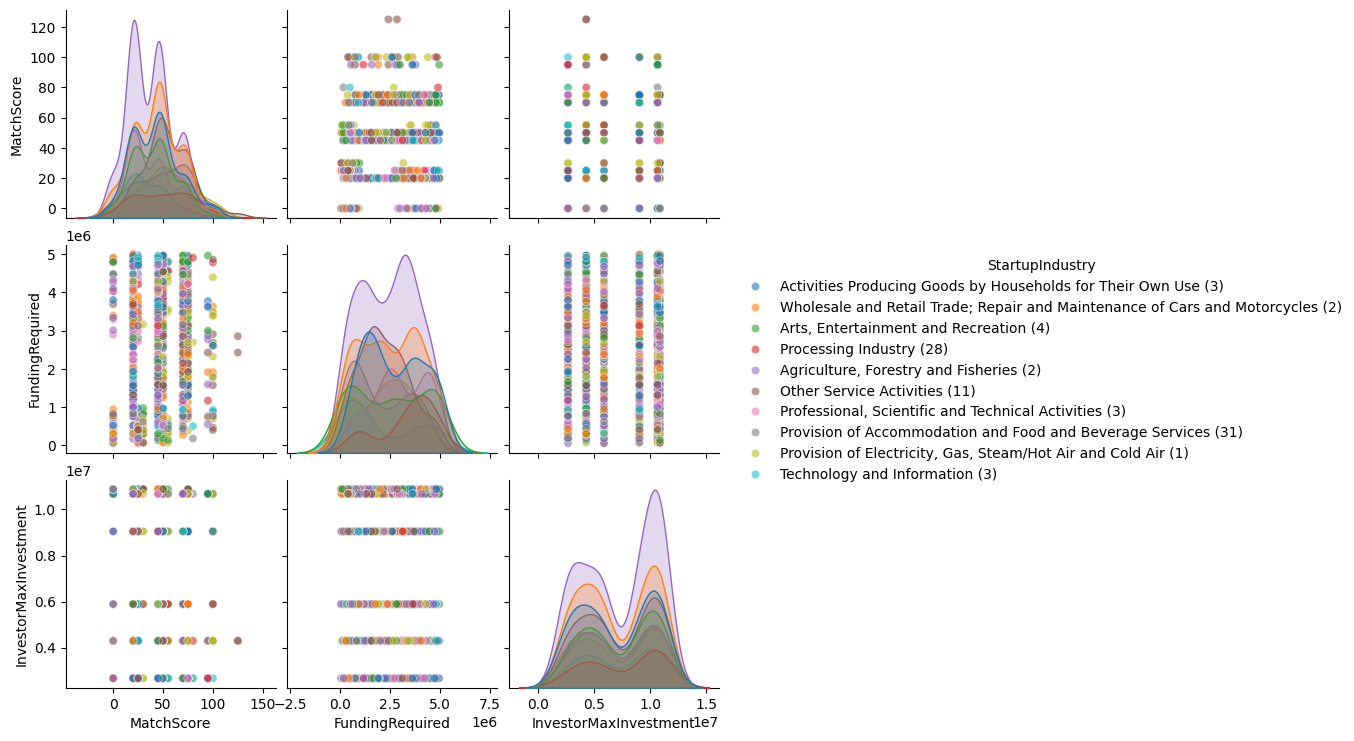

In [ ]:
# ==============================================================================
# 🚀 Startup-Investor Matchmaking System with Real Dataset Integration
#     (3D Version + 5 Dimensions → 10 Industries)
# ==============================================================================

# 📦 --- Imports ---
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# ⚙️ --- Configuration ---
SCORE_WEIGHTS = {
    "industry": 30,
    "stage": 25,
    "funding": 20,
    "tags": 25,
}

# 🏗️ --- 1. Load Real Startup Data with 5 Dimensions → 10 Industries ---
def load_real_startups(file_path):
    df = pd.read_csv(file_path)

    # --- Mapping indicators to dimensions (only 5) ---
    dimension_mapping = {
        "Entrepreneurial University": [col for col in df.columns if col.startswith("EU")],
        "Business Performance": [col for col in df.columns if col.startswith("BP")],
        "Entrepreneurial Leadership": [col for col in df.columns if col.startswith("BL")],
        "АІ-Enabled Customer Experience": [col for col in df.columns if col.startswith("AI-ECE")],
        "SDG-Oriented Higher Education": [col for col in df.columns if col.startswith("SOHE")]
    }

    # --- Mapping dimension → list of industries ---
    industry_groups = {
        "Entrepreneurial University": [
            "Agriculture, Forestry and Fisheries (2)",
            "Wholesale and Retail Trade; Repair and Maintenance of Cars and Motorcycles (2)"
        ],
        "Business Performance": [
            "Processing Industry (28)",
            "Technology and Information (3)",
            "Provision of Accommodation and Food and Beverage Services (31)"
        ],
        "Entrepreneurial Leadership": [
            "Provision of Electricity, Gas, Steam/Hot Air and Cold Air (1)",
            "Provision of Accommodation and Food and Beverage Services (31)"
        ],
        "АІ-Enabled Customer Experience": [
            "Activities Producing Goods by Households for Their Own Use (3)",
            "Arts, Entertainment and Recreation (4)"
        ],
        "SDG-Oriented Higher Education": [
            "Other Service Activities (11)",
            "Professional, Scientific and Technical Activities (3)"
        ]
    }

    startups_data = []
    stages = ["Pre-seed", "Seed", "Series A", "Series B"]
    startup_tags = ["B2B", "Disruptive Tech", "Sustainable", "Data-driven", "Mobile-first", "Hardware"]

    for idx, row in df.iterrows():
        # Hitung rata-rata tiap dimension
        avg_scores = {dim: row[cols].mean() for dim, cols in dimension_mapping.items() if len(cols) > 0}
        best_dimension = max(avg_scores, key=avg_scores.get)

        # Ambil salah satu industry dari list dimension tsb
        best_industry = np.random.choice(industry_groups.get(best_dimension, ["Other Service Activities (11)"]))

        startups_data.append({
            "StartupName": f"Respondent_{idx+1}",
            "Dimension": best_dimension,
            "Industry": best_industry,
            "Stage": np.random.choice(stages),
            "FundingRequired": np.random.randint(50000, 5000000),
            "Tags": list(np.random.choice(startup_tags, np.random.randint(1, 4), replace=False))
        })

    return pd.DataFrame(startups_data)

# --- Investor Data (6 investors + 10 industries) ---
def generate_investors(num_investors=6):
    industries = [
        "Technology and Information (3)",
        "Other Service Activities (11)",
        "Provision of Accommodation and Food and Beverage Services (31)",
        "Arts, Entertainment and Recreation (4)",
        "Professional, Scientific and Technical Activities (3)",
        "Provision of Electricity, Gas, Steam/Hot Air and Cold Air (1)",
        "Activities Producing Goods by Households for Their Own Use (3)",
        "Agriculture, Forestry and Fisheries (2)",
        "Processing Industry (28)",
        "Wholesale and Retail Trade; Repair and Maintenance of Cars and Motorcycles (2)"
    ]
    stages = ["Pre-seed", "Seed", "Series A", "Series B"]
    investor_tags = ["B2B", "Sustainable", "AI/ML", "FinTech", "Deep Tech", "Data-driven", "SaaS"]

    investors_data = {
        "InvestorName": [
            "BNI Ventures", "BRI Ventures", "Telkomsel Ventures",
            "East Ventures", "Argo", "Clay Capital",
        ][:num_investors],
        "PreferredIndustries": [list(np.random.choice(industries, np.random.randint(2, 4), replace=False)) for _ in range(num_investors)],
        "PreferredStages": [list(np.random.choice(stages, np.random.randint(1, 3), replace=False)) for _ in range(num_investors)],
        "MinInvestment": np.random.randint(25000, 1000000, num_investors),
        "MaxInvestment": np.random.randint(1000000, 10000000, num_investors),
        "Interests": [list(np.random.choice(investor_tags, np.random.randint(2, 4), replace=False)) for _ in range(num_investors)]
    }
    investors_df = pd.DataFrame(investors_data)
    investors_df['MaxInvestment'] = investors_df[['MinInvestment', 'MaxInvestment']].max(axis=1) + np.random.randint(500000, 2000000, num_investors)
    return investors_df

# 🧠 --- 2. Matching Logic ---
def calculate_match_score(startup, investor):
    score = 0
    if startup["Industry"] in investor["PreferredIndustries"]:
        score += SCORE_WEIGHTS["industry"]
    if startup["Stage"] in investor["PreferredStages"]:
        score += SCORE_WEIGHTS["stage"]
    if investor["MinInvestment"] <= startup["FundingRequired"] <= investor["MaxInvestment"]:
        score += SCORE_WEIGHTS["funding"]
    matching_tags = set(startup["Tags"]) & set(investor["Interests"])
    score += len(matching_tags) * SCORE_WEIGHTS["tags"]
    return score

# ✨ --- Main Execution ---
print("--- 🚀 Initializing Startup-Investor Matchmaking System (5 Dimensions → 10 Industries) ---\n")

# 1. Load startups
startups = load_real_startups("Dataset.csv")
print(f"Loaded {len(startups)} startups from real dataset.\n")

# 2. Generate investors
investors = generate_investors()
print(f"Generated {len(investors)} investors.\n")

# 3. Matchmaking
match_records = []
for _, startup in startups.iterrows():
    for _, investor in investors.iterrows():
        score = calculate_match_score(startup, investor)
        match_records.append({
            "StartupName": startup["StartupName"],
            "Dimension": startup["Dimension"],
            "InvestorName": investor["InvestorName"],
            "MatchScore": score,
            "StartupIndustry": startup["Industry"],
            "FundingRequired": startup["FundingRequired"],
            "InvestorMaxInvestment": investor["MaxInvestment"]
        })

match_df = pd.DataFrame(match_records)
print("--- ✅ Match data processed for visualization ---\n")

# 📊 --- Visualization ---
pairplot_data = match_df.sample(n=min(1000, len(match_df)), random_state=42)

# 🔹 Pairplot
sns.pairplot(
    pairplot_data,
    vars=['MatchScore', 'FundingRequired', 'InvestorMaxInvestment'],
    hue='StartupIndustry',
    diag_kind='kde',
    plot_kws={'alpha': 0.6},
    palette='tab10'
)
plt.show()

# 🌍 3D Scatter
fig = px.scatter_3d(
    pairplot_data,
    x="FundingRequired",
    y="InvestorMaxInvestment",
    z="MatchScore",
    color="StartupIndustry",
    hover_data=["StartupName", "InvestorName", "Dimension"],
    opacity=0.7
)
fig.update_traces(marker=dict(size=5))
fig.update_layout(
    title="3D Visualization of Startup-Investor Matches (5 Dimensions → 10 Industries)",
    scene=dict(
        xaxis_title="Funding Required",
        yaxis_title="Investor Max Investment",
        zaxis_title="Match Score"
    )
)
fig.show()


--- 🚀 Initializing Startup-Investor Matchmaking System with Real Data (3D Version + Industry Mapping) ---

Loaded 238 startups from real dataset.

Generated 12 investors.

--- ✅ Match data processed for visualization ---





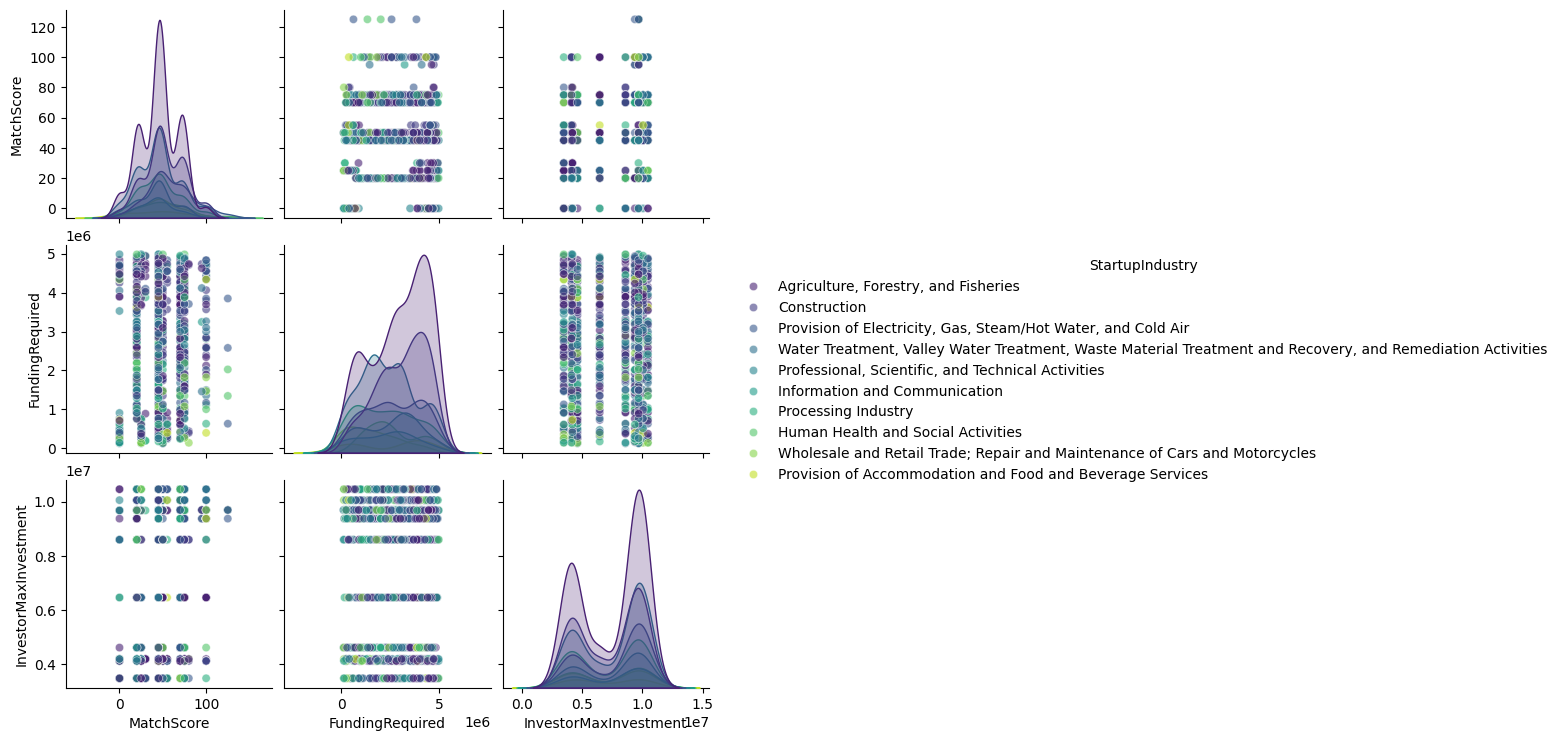


--- ✅ All visualizations complete ---


In [ ]:
# ==============================================================================
# 🚀 Startup-Investor Matchmaking System with Real Dataset Integration (3D Version + Industry Mapping)
# ==============================================================================

# 📦 --- Imports ---
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# ⚙️ --- Configuration ---
SCORE_WEIGHTS = {
    "industry": 30,
    "stage": 25,
    "funding": 20,
    "tags": 25,
}

# 🏗️ --- 1. Load Real Startup Data with Dimension → Industry Mapping ---
def load_real_startups(file_path):
    df = pd.read_csv(file_path)

    # --- Mapping indicators to dimensions ---
    dimension_mapping = {
        "Entrepreneurial University": [col for col in df.columns if col.startswith("EU")],
        "Business Performance": [col for col in df.columns if col.startswith("BP")],
        "Entrepreneurial Leadership": [col for col in df.columns if col.startswith("BL")],
        "АІ-Enabled Customer Experience": [col for col in df.columns if col.startswith("AI-ECE")],
        "SDG-Oriented Higher Education": [col for col in df.columns if col.startswith("SOHE")],
        "Institutional Sustainable Entrepreneurial Culture": [col for col in df.columns if col.startswith("ISEC")],
        "Start (or Stop) a Business": [col for col in df.columns if col.startswith("SB")],
        "Artificial Intelligence": [col for col in df.columns if col.startswith("AI") and not col.startswith("AI-ECE")],
        "Digital Talent": [col for col in df.columns if col.startswith("DT")],
        "Entrepreneurial Orientation": [col for col in df.columns if col.startswith("EO")]
    }

    # --- Mapping dimension to industry_group ---
    industry_groups = {
        "Entrepreneurial University": "Agriculture, Forestry, and Fisheries",
        "Business Performance": "Processing Industry",
        "Entrepreneurial Leadership": "Provision of Electricity, Gas, Steam/Hot Water, and Cold Air",
        "АІ-Enabled Customer Experience": "Water Treatment, Valley Water Treatment, Waste Material Treatment and Recovery, and Remediation Activities",
        "SDG-Oriented Higher Education": "Construction",
        "Institutional Sustainable Entrepreneurial Culture": "Wholesale and Retail Trade; Repair and Maintenance of Cars and Motorcycles",
        "Start (or Stop) a Business": "Provision of Accommodation and Food and Beverage Services",
        "Artificial Intelligence": "Information and Communication",
        "Digital Talent": "Professional, Scientific, and Technical Activities",
        "Entrepreneurial Orientation": "Human Health and Social Activities",
    }

    startups_data = []
    stages = ["Pre-seed", "Seed", "Series A", "Series B"]
    startup_tags = ["B2B", "Disruptive Tech", "Sustainable", "Data-driven", "Mobile-first", "Hardware"]

    for idx, row in df.iterrows():
        # Hitung rata-rata tiap dimension
        avg_scores = {dim: row[cols].mean() for dim, cols in dimension_mapping.items() if len(cols) > 0}
        # Ambil dimension dengan skor tertinggi
        best_dimension = max(avg_scores, key=avg_scores.get)
        # Pemetaan ke industry_group
        best_industry = industry_groups.get(best_dimension, "Other Service Activities")

        startups_data.append({
            "StartupName": f"Respondent_{idx+1}",
            "Dimension": best_dimension,
            "Industry": best_industry,
            "Stage": np.random.choice(stages),
            "FundingRequired": np.random.randint(50000, 5000000),
            "Tags": list(np.random.choice(startup_tags, np.random.randint(1, 4), replace=False))
        })

    return pd.DataFrame(startups_data)

# --- Investor Data (synthetic for demo) ---
def generate_investors(num_investors=12):
    industries = [
        "Agriculture, Forestry, and Fisheries",
        "Processing Industry",
        "Provision of Electricity, Gas, Steam/Hot Water, and Cold Air",
        "Water Treatment, Valley Water Treatment, Waste Material Treatment and Recovery, and Remediation Activities",
        "Construction",
        "Wholesale and Retail Trade; Repair and Maintenance of Cars and Motorcycles",
        "Provision of Accommodation and Food and Beverage Services",
        "Information and Communication",
        "Professional, Scientific, and Technical Activities",
        "Human Health and Social Activities"
    ]
    stages = ["Pre-seed", "Seed", "Series A", "Series B"]
    investor_tags = ["B2B", "Sustainable", "AI/ML", "FinTech", "Deep Tech", "Data-driven", "SaaS"]

    investors_data = {
        "InvestorName": [f"CapitalVentures_{i}" for i in range(num_investors)],
        "PreferredIndustries": [list(np.random.choice(industries, np.random.randint(2, 5), replace=False)) for _ in range(num_investors)],
        "PreferredStages": [list(np.random.choice(stages, np.random.randint(1, 4), replace=False)) for _ in range(num_investors)],
        "MinInvestment": np.random.randint(25000, 1000000, num_investors),
        "MaxInvestment": np.random.randint(1000000, 10000000, num_investors),
        "Interests": [list(np.random.choice(investor_tags, np.random.randint(2, 5), replace=False)) for _ in range(num_investors)]
    }
    investors_df = pd.DataFrame(investors_data)
    investors_df['MaxInvestment'] = investors_df[['MinInvestment', 'MaxInvestment']].max(axis=1) + np.random.randint(500000, 2000000, num_investors)
    return investors_df

# 🧠 --- 2. Matching Logic ---
def calculate_match_score(startup, investor):
    score = 0
    if startup["Industry"] in investor["PreferredIndustries"]:
        score += SCORE_WEIGHTS["industry"]
    if startup["Stage"] in investor["PreferredStages"]:
        score += SCORE_WEIGHTS["stage"]
    if investor["MinInvestment"] <= startup["FundingRequired"] <= investor["MaxInvestment"]:
        score += SCORE_WEIGHTS["funding"]
    matching_tags = set(startup["Tags"]) & set(investor["Interests"])
    score += len(matching_tags) * SCORE_WEIGHTS["tags"]
    return score

# ✨ --- Main Execution ---
print("--- 🚀 Initializing Startup-Investor Matchmaking System with Real Data (3D Version + Industry Mapping) ---\n")

# 1. Load real startups from dataset
startups = load_real_startups("Dataset.csv")
print(f"Loaded {len(startups)} startups from real dataset.\n")

# 2. Generate investors
investors = generate_investors()
print(f"Generated {len(investors)} investors.\n")

# 3. Matchmaking
match_records = []
for _, startup in startups.iterrows():
    for _, investor in investors.iterrows():
        score = calculate_match_score(startup, investor)
        match_records.append({
            "StartupName": startup["StartupName"],
            "Dimension": startup["Dimension"],
            "InvestorName": investor["InvestorName"],
            "MatchScore": score,
            "StartupIndustry": startup["Industry"],
            "FundingRequired": startup["FundingRequired"],
            "InvestorMaxInvestment": investor["MaxInvestment"]
        })

match_df = pd.DataFrame(match_records)

print("--- ✅ Match data processed for visualization ---\n")
print("\n" + "="*60 + "\n")

# 📊 --- Visualization (Pairplot + 3D Scatter) ---
pairplot_data = match_df.sample(n=min(1000, len(match_df)), random_state=42)

# 🔹 Pairplot
sns.pairplot(
    pairplot_data,
    vars=['MatchScore', 'FundingRequired', 'InvestorMaxInvestment'],
    hue='StartupIndustry',
    diag_kind='kde',
    plot_kws={'alpha': 0.6},
    palette='viridis'
)
plt.show()

print("\n--- ✅ All visualizations complete ---")
